In [ ]:
import sys, os
sys.path.append(os.path.abspath("../src"))
from config import DB_HOST, DB_PORT, DB_NAME, DB_USER, DB_PASSWORD

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

sns.set(style="whitegrid", context="notebook")

engine = create_engine(DATABASE_URL)
stations = pd.read_sql("SELECT * FROM dim_station", engine)
statuses = pd.read_sql("SELECT * FROM fact_station_status", engine)


In [30]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1910 non-null   object 
 1   name        1910 non-null   object 
 2   latitude    1910 non-null   float64
 3   longitude   1910 non-null   float64
 4   city        1910 non-null   object 
 5   is_active   1910 non-null   bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 76.6+ KB


In [21]:
statuses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               5730 non-null   int64              
 1   station_id       5730 non-null   object             
 2   timestamp_utc    5730 non-null   datetime64[ns, UTC]
 3   free_bikes       5730 non-null   int64              
 4   empty_slots      5730 non-null   int64              
 5   capacity         5730 non-null   int64              
 6   occupancy_ratio  5730 non-null   float64            
 7   status_label     5730 non-null   object             
 8   raw_extra        5730 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 403.0+ KB


In [ ]:
stations.head()s

,station_id,name,latitude,longitude,city,is_active
0,0045c4ba7f11a31d591ab47fcc622eb2,Walsh Park,41.914610,-87.667968,"Chicago, IL",True
1,6f30093831b934a8414a03d487cc56cc,Racine Ave & Broadway,41.968235,-87.659655,"Chicago, IL",True
2,83dd1e9ceff9299708c834ec91298d3e,Big Marsh Park,41.685877,-87.573824,"Chicago, IL",True
3,bc9bcc704d05b8355608c21dd284faf7,Dusable Harbor,41.886976,-87.612813,"Chicago, IL",True
4,c39bf3b3e13fa5d577fe25860b623ea6,Indiana Ave & 103rd St,41.707170,-87.618472,"Chicago, IL",True


In [32]:
statuses.head()

,id,station_id,timestamp_utc,free_bikes,empty_slots,capacity,occupancy_ratio,status_label,raw_extra
0,1,000db9b6e3849926d4868caf7096780d,2025-11-16 20:45:24.619673+00:00,6,7,15,0.40,normal,{'uid': 'a3ac8dfb-a135-11e9-9cda-0a87ae2ba916'...
1,2,000e436b8d7bf9fd184d41b156f948cb,2025-11-16 20:45:24.623524+00:00,6,8,15,0.40,normal,{'uid': 'a3a93622-a135-11e9-9cda-0a87ae2ba916'...
2,3,002de9654c7c9dcf1c9f22de778b6669,2025-11-16 20:45:24.642550+00:00,0,1,1,0.00,empty,"{'uid': '1674190286791649784', 'renting': 1, '..."
3,4,003c8c815229c2e4b84b4936ce753108,2025-11-16 20:45:24.570886+00:00,1,14,15,0.07,empty,{'uid': '87d2a090-22cd-471b-b622-fef3923999dd'...
4,5,0045c4ba7f11a31d591ab47fcc622eb2,2025-11-16 20:45:24.588145+00:00,0,22,23,0.00,empty,{'uid': 'a3b38728-a135-11e9-9cda-0a87ae2ba916'...


In [17]:
statuses['timestamp_utc'].sort_values()

374    2025-11-16 20:45:24.563984+00:00
4194   2025-11-16 20:45:24.563984+00:00
2284   2025-11-16 20:45:24.563984+00:00
3903   2025-11-16 20:45:24.564006+00:00
1993   2025-11-16 20:45:24.564006+00:00
                     ...               
755    2025-11-16 20:45:24.719902+00:00
4575   2025-11-16 20:45:24.719902+00:00
3855   2025-11-16 20:45:24.719912+00:00
1945   2025-11-16 20:45:24.719912+00:00
35     2025-11-16 20:45:24.719912+00:00
Name: timestamp_utc, Length: 5730, dtype: datetime64[ns, UTC]

In [18]:
statuses['timestamp_utc'].sort_values(ascending = False)

3855   2025-11-16 20:45:24.719912+00:00
1945   2025-11-16 20:45:24.719912+00:00
35     2025-11-16 20:45:24.719912+00:00
2665   2025-11-16 20:45:24.719902+00:00
755    2025-11-16 20:45:24.719902+00:00
                     ...               
3903   2025-11-16 20:45:24.564006+00:00
1993   2025-11-16 20:45:24.564006+00:00
2284   2025-11-16 20:45:24.563984+00:00
4194   2025-11-16 20:45:24.563984+00:00
374    2025-11-16 20:45:24.563984+00:00
Name: timestamp_utc, Length: 5730, dtype: datetime64[ns, UTC]

In [ ]:
import os

# check if running inside Docker or locally
OUTPUT_DIR = os.path.join(os.getcwd(), "output")

# If running notebook under /src or /notebooks, go one level up
if not os.path.exists(OUTPUT_DIR):
    OUTPUT_DIR = os.path.abspath(os.path.join("..", "output"))
    
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Saving plots to: {OUTPUT_DIR}")

Saving plots to: /Users/lulu/Documents/DE/Final Project/mlds-divvy-forecast/notebook/../outputs


/Users/lulu/Documents/DE/Final Project/src


In [25]:
df = statuses.merge(stations, on="station_id", how="left")

# Compute mean occupancy per station
station_rank = (
    df.groupby(["station_id", "name"])["occupancy_ratio"]
      .mean()
      .reset_index()
      .rename(columns={"occupancy_ratio": "avg_occupancy"})
      .sort_values("avg_occupancy", ascending=False)
      .reset_index(drop=True)
)

# Add rank column
station_rank["rank"] = station_rank["avg_occupancy"].rank(ascending=False, method="dense").astype(int)

station_rank.head(10)

,station_id,name,avg_occupancy,rank
0,9cc0a3d2a42471ad8c3479d6b26d7030,Public Rack - Central Park & Peterson,4.50,1
1,b6f3aa0764bf2ceec7afccd07a9136c3,Public Rack - State ST & 42nd St,3.00,2
2,c3b68f79f8e32590107208c4f7dc63a2,Public Rack - Kedzie Ave & 64th St - SE,3.00,2
3,eaf2a1a1e71d30083577293b340f8f5f,Public Rack - Justine St & 87th St,2.00,3
4,92b372a828036532e30261131b5c33f5,Public Rack - Washtenaw Ave & Devon Ave,2.00,3
5,93ede38517bef772009b09fdd2c4e855,Public Rack - Kedzie Ave & Argyle St,1.50,4
6,3f0c13be6f54a197cac54669ff0468e1,Public Rack - Kenneth & Carmen,1.50,4
7,463a69b0c19fe7ffef6ba7a65992e207,Public Rack - Emerald Ave & 43rd St,1.50,4
8,0ca4cedb262927456045931abf38578d,Peoria St & Kinzie St,1.27,5
9,6e9b7ef4351a08f9d652a8d6ab852479,Wood St & Walnut St,1.17,6


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=station_rank.head(10),
    x="avg_occupancy",
    y="name",
    palette="Blues_r"
)
plt.title("Top 10 Stations by Average Occupancy Ratio")
plt.xlabel("Average Occupancy Ratio")
plt.ylabel("Station Name")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "top_10_Stations_by_Average_Occupancy_Ratio.png"), dpi=300)
plt.close()


/var/folders/8k/q6d0vdfs4rlgwrf9mlvkdj6m0000gn/T/ipykernel_59713/2283210866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [48]:
# Constants for Chicago boundaries
MADISON_LAT = 41.8820   # North of this = North Side, South of this = South Side
STATE_LON = -87.6278    # West of this = West Side, East of this = East Side

def classify_region(lat, lon):
    if lat > MADISON_LAT and abs(lon - STATE_LON) <= 0.01:
        return "North Side"
    elif lat < MADISON_LAT and abs(lon - STATE_LON) <= 0.01:
        return "South Side"
    elif lon > STATE_LON:
        return "East Side"
    elif lon < STATE_LON:
        return "West Side"
    else:
        return "Central"  # fallback, e.g. exactly on dividing line

stations["region"] = stations.apply(lambda r: classify_region(r["latitude"], r["longitude"]), axis=1)


df = statuses.merge(stations, on="station_id", how="left")

region_stats = (
    df.groupby("region")["occupancy_ratio"]
      .agg(["mean", "std", "count"])
      .reset_index()
      .sort_values("mean", ascending=False)
)


plt.figure(figsize=(8,5))
sns.barplot(data=region_stats, x="region", y="mean", palette="viridis")
plt.title("Average Occupancy Ratio by Chicago Region")
plt.ylabel("Mean Occupancy Ratio")
plt.xlabel("Region")


plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "Average_Occupancy_Ratio_by_Chicago_Region.png"), dpi=300)
plt.close()

/var/folders/8k/q6d0vdfs4rlgwrf9mlvkdj6m0000gn/T/ipykernel_59713/340121532.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_stats, x="region", y="mean", palette="viridis")


In [49]:
sns.histplot(df["free_bikes"].dropna(), bins=30)
plt.title("Distribution of Free Bikes Across All Stations")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "Distribution_of_Free_Bikes_Across_All_Stations.png"), dpi=300)
plt.close()

<Axes: title={'center': 'Most Volatile Stations (Occupancy Std Dev)'}, ylabel='name'>

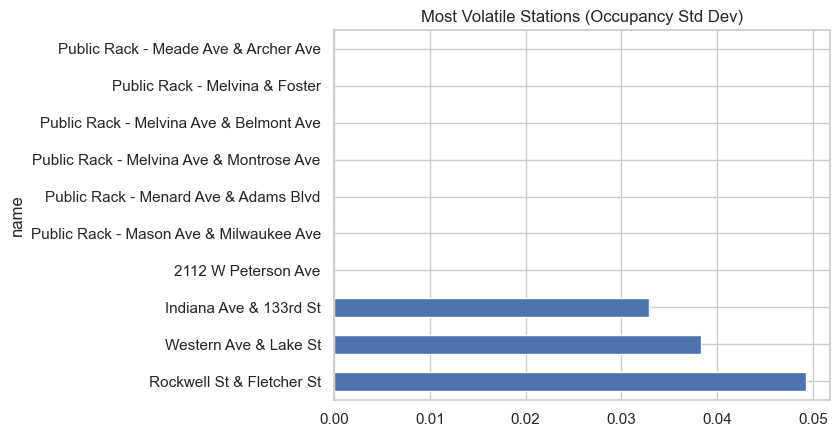

In [ ]:
# Identifies unstable stations — good for maintenance or rebalancing analysis.
variability = df.groupby("name")["occupancy_ratio"].std().sort_values(ascending=False)
variability.head(10).plot(kind="barh", title="Most Volatile Stations (Occupancy Std Dev)")


plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "Most_Volatile_Stations.png"), dpi=300)
plt.close()